In [43]:
df.to_csv("vendas.csv", index=False)

In [41]:
#código teste do banco de dados com as primeiras 5 linhas
query = "SELECT * FROM vendas LIMIT 5"
pd.read_sql(query, conn)

,ORDERNUMBER,Quantidade,PrecoCada,ORDERLINENUMBER,Receita,DataPedido,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,Cidade,Estado,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Data,Ano-Mes


In [ ]:
import sqlite3

conn = sqlite3.connect("vendas.db")
df.to_sql("vendas", conn, if_exists="replace", index=False)


Banco de dados SQLite:

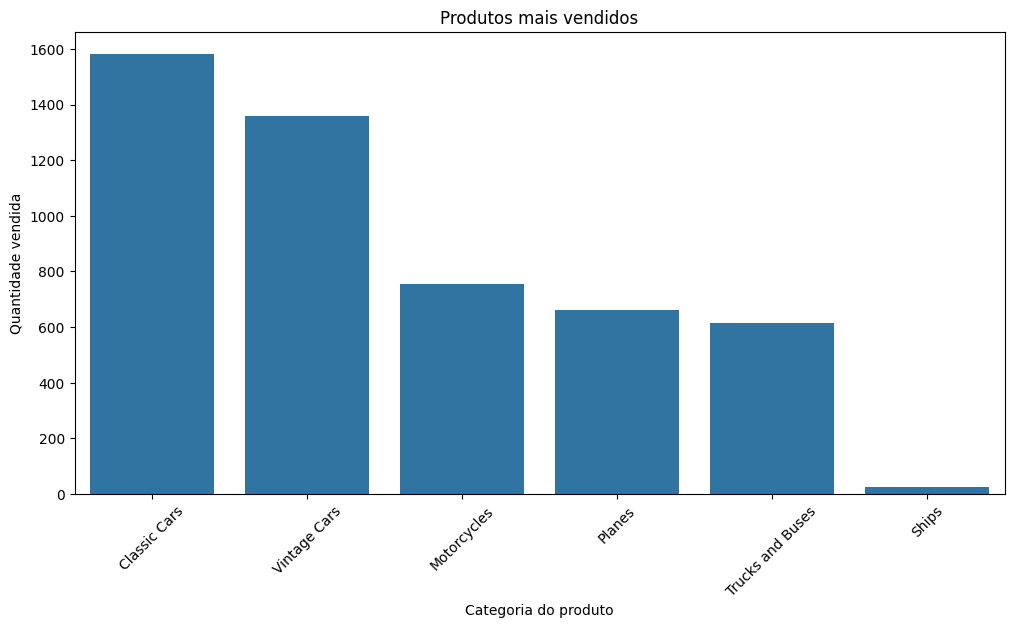

In [ ]:
top_produtos = df.groupby("PRODUCTLINE")["Quantidade"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_produtos.index, y=top_produtos.values)
plt.title("Produtos mais vendidos")
plt.xlabel("Categoria do produto")
plt.ylabel("Quantidade vendida")
plt.xticks(rotation=45)
plt.show()

PRODUTOS MAIS VENDIDOS:

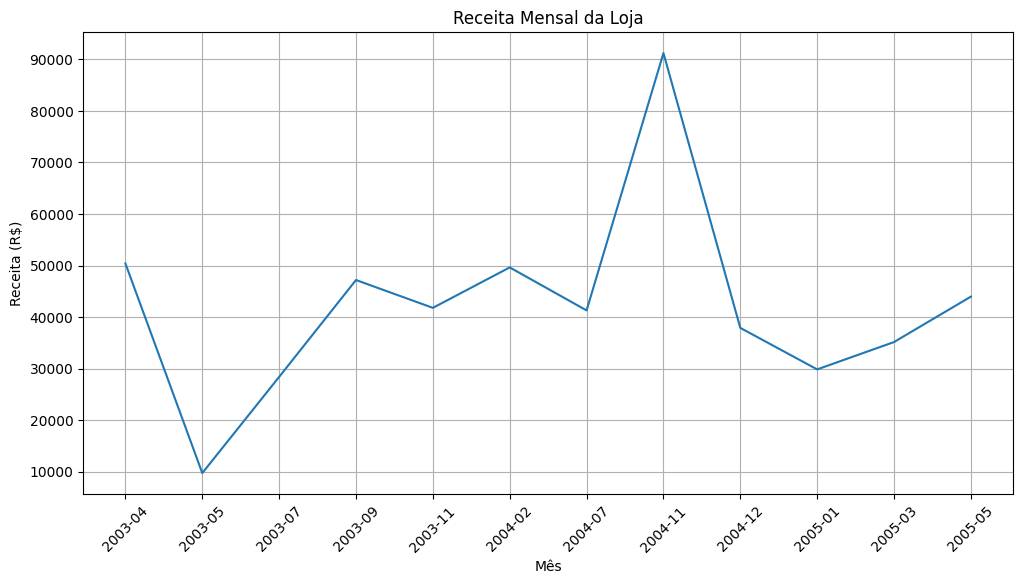

In [ ]:
df["Data"] = pd.to_datetime(df["DataPedido"])
df["Ano-Mes"] = df["Data"].dt.to_period("M")

receita_mensal = df.groupby("Ano-Mes")["Receita"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=receita_mensal.index.astype(str), y=receita_mensal.values, markers="o")
plt.xticks(rotation=45)
plt.title("Receita Mensal da Loja")
plt.xlabel("Mês")
plt.ylabel("Receita (R$)")
plt.grid()
plt.show()

RECEITA POR MÊS:

In [ ]:
receita_total = df["Receita"].sum()
print(f"Receita total: R$ {receita_total:,.2f}")

Receita total: R$ 506,562.52


RECEITA TOTAL:

In [ ]:
df.rename(columns={"QUANTITYORDERED": "Quantidade", "SALES": "Receita", "CITY": "Cidade", "STATE": "Estado","PRODUCTCODE": "CodProduto", "PHONE": "Telefone", "PRICEEACH": "PrecoCada", "CUSTOMERNAME": "NomeCliente", "ORDERDATE": "DataPedido"}, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 10 to 2791
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       147 non-null    int64  
 1   Quantidade        147 non-null    int64  
 2   PrecoCada         147 non-null    float64
 3   ORDERLINENUMBER   147 non-null    int64  
 4   Receita           147 non-null    float64
 5   DataPedido        147 non-null    object 
 6   STATUS            147 non-null    object 
 7   QTR_ID            147 non-null    int64  
 8   MONTH_ID          147 non-null    int64  
 9   YEAR_ID           147 non-null    int64  
 10  PRODUCTLINE       147 non-null    object 
 11  MSRP              147 non-null    int64  
 12  CodProduto        147 non-null    object 
 13  NomeCliente       147 non-null    object 
 14  Telefone          147 non-null    object 
 15  ADDRESSLINE1      147 non-null    object 
 16  ADDRESSLINE2      147 non-null    object 
 17  

ORDERNUMBER         0
Quantidade          0
PrecoCada           0
ORDERLINENUMBER     0
Receita             0
DataPedido          0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
CodProduto          0
NomeCliente         0
Telefone            0
ADDRESSLINE1        0
ADDRESSLINE2        0
Cidade              0
Estado              0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
df = pd.read_csv("C:\database\sales_data_sample.csv", encoding="latin1")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\devce\AppData\Local\Temp\ipykernel_11696\1666307429.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("C:\database\sales_data_sample.csv", encoding="latin1")


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns